In [ ]:
def main():
  name = get_name()
  house = get_house()
  print(f"{name} is from {house}")

def get_name():
  return input("Name: ")

def get_house():
  return input("House: ")

if __name__ == "__main__":
  main()

Name: ondrej
House: liberec
ondrej is from liberec


maybe it´s going to be better to define a function called get_student that will get everything for us at once

In [ ]:
def main():
  name, house = get_student() #I´m receiving multiple values
  print(f"{name} from {house}")

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return name, house #I´m returning multiple values here (but I´m actually returning just 1 value = 1 tuple)

if __name__ == "__main__":
  main()

Name: ondrej
House: liberec
ondrej is from liberec


# Tuple
- we´ve just used a tuple
- it´s similar to a list, but it´s inmutable
- I cannot change the values inside of a tuple
- it´s possible to do it like this:

In [ ]:
def main():
  student = get_student() #student´s going to be a tuple
  print(f"{student[0]} from {student[1]}") # this needs to be changed like this

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return (name, house) # making it more obvious it´s going to return a tuple
  # return [name,house] if I wanted to return a list

if __name__ == "__main__":
  main()

Name: ondrej
House: liberec
ondrej from liberec


doing it with a dictionary

In [ ]:
def main():
  student = get_student()
  print(f"{student['name']} from {student['house']}")  # watch for single quotes

def get_student():
  student = {}
  student["name"] = input("Name: ")
  student["house"] = input("House: ")
  return student

if __name__ == "__main__":
  main()

Name: ondrej
House: liberec
ondrej from liberec


simplification

In [ ]:
def main():
  student = get_student()
  print(f"{student['name']} from {student['house']}")

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return {"name" = name, "house" = house}

if __name__ == "__main__":
  main()

replacing value in a dictionary

In [ ]:
def main():
  student = get_student()
  if student["name"] == "Padma":
    student["house"] = "Ravenclaw"
  print(f"{student['name']} from {student['house']}")

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return {"name": name, "house": house}

if __name__ == "__main__":
  main()

Name: Padma
House: Liea
Padma from Ravenclaw


#Classes
- wouldn´t it be nice if there was a data type __student__?
- I wouldn´t need to thing whether to use list, dictionary, tuple, ...
- classes are just my own created data types with own names
- classes are like a blueprint for pieces of data

In [ ]:
class Student: # convention to use capital letter
  ...

def main():
  student = get_student()
  print(f"{student.name} from {student.house}")


def get_student():
  student = Student() #appears to be calling a function - the function matches the name of the class
  #student["name"] = ... # if I were using a dictionary .. but I´m not using a dictionary now, I´m using class
  student.name = input("Name: ") #classes have attributes - denoted by "."
  student.house = input("House: ")
  return student


if __name__ == "__main__":
  main()

Name: ondrej
House: liberec
ondrej from liberec


# Object
- I can create a class using __class__ keyword
- whenever I use a class, I´m creating what´s called an __object__
- with __student = Student()__ I´m creating an object of that class
  - you create object from classes
  - class is like a blueprint for house
  - object is when you use that blueprint to build a specific house
  - class is like a mold
  - object is when you use that mold to build a house
  - class is a definition of a new datatype
  - object is the incarnation, or better say instantiation
  - another term for object is an __instance__


# methods
- Let´s do it differently now
- we pass arguments into the Student() function
- Student class does not know how to handle it
- we need to specify what the Student should do with it
- if you want to initialize the contents of an object from a class, you define the __init__ method

In [ ]:
class Student: # convention to use capital letter
  def __init__(self, name, house): #"dunder" init method (designed by authors of python)
    self.name = name
    self.house = house


def main():
  student = get_student()
  print(f"{student.name} from {student.house}")


def get_student():
  name = input("Name: ")
  house = input("House: ")
  student = Student(name,house) #I´m treating Student() as a function and passing values into it
  return student


if __name__ == "__main__":
  main()

- __Student(name,house)__ is generally called a __constructor call__
  - this line of code is going to construct a student object for me
- the fact that I´m calling Student() function means that there should somewhere be a function that has been defined with __def__ that´s going to be called
- the function that will always be called (by definition how python classes work) is a function called **init**
  - it´s a crazy name but it´s like that
- the weird thing is the "self" parameter

In [ ]:
# imagine
class Student:
  def __init__(name,house): # without the self
    # ... what do I do here with the name and house? where am I going to put it?

- if you want to remember the name and the house for this student, you need to be able to store the values somewhere
- how do you store them in the current object that has just been instantiated?
  - python authors decided that this __init__ method also takes the third argument (that has to come first): __self__
  - self gives you access to the current object that has just been created
- so on line 14, I construct an object
  - there´s nothing in the object initially
  - there´s no name and no house in the object
  - the object now exists in the computer memory
  - now it´s up to me to store name and house inside of that object
  - how do I do that?
    - python will automatically call the __init__ method
    - it will automatically pass in a reference to an argument that represents the current object that has just constructed in memory for you
    - it´s up to you to populate it with values .. how?
    - with running __self.name = name__
      - inside of __init__ method, you can do self.name to create a new attribute (aka instance variable) called __name__ inside of that otherwise empty object and put value of "name" inside of it
      - I could name the attributes differently, for example self.n and self.h

- the purpose of the init method is to initialize an otherwise empty object when you first create it
--------------------------------------------------------
- what if someone inputs a missing value, etc. - where should I handle the data check?
  - I want to check for errors even before I´m creating an object
  - is the student empty? if so, don´t create an empty object
  - is the house one of those 4 houses we know in Harry Potter? if not, don´t create the student object

- I will not be inserting data validation inside of the get_student() function, rather I will put it inside of the Student class
  - Silvia:  všechno co patří ke studentovi, bude řešit Student třída:
- OOP encourages you to encapsulate inside of a class, all functionalities related to that class
  - when I wanna validate if the name exists
  - when I wanna validate if the house is correct
  - ... that all belongs fundamentally inside of the class Student (not some random function that belongs elsewhere)


In [ ]:
class Student: # convention to use capital letter
  def __init__(self, name, house):
    if not name: # if name is empty
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

def main():
  student = get_student()
  print(f"{student.name} from {student.house}")

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

- wouldn´t it be nice to do something like this?

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name: # if name is empty
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

def main():
  student = get_student()
  print(student) #................... just printing student instead of that crazy f-string

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

Name: ondrej
House: Gryffindor


- I get an error: <__main__.Student object at 0x7f779abf1b10>
- I can see where in the computer memory the object is
# str method
- special method
- if I define it in my class, python will automatically call this function for me anytime some other function wants to see some object as a string
  - print(student) wants to see my object as a string
  - if I don´t have this method in my class, it´s going to print the object´s address in memory

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name: # if name is empty
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

  def __str__(self):
    return "a student"

def main():
  student = get_student()
  print(student) # the same thing, but now it´s going to call the __str__ method and print out "a student"

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

Name: ondrej
House: Gryffindor
a student


- the function print() is hoping to get a string, therefore it´s going to trigger the __str__ method
- python for you automatically is going to pass into the method a reference to the object that´s trying to be printed
- now I´m changing to code so I can actually see the output I want to see

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

def main():
  student = get_student()
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

Name: ondrej
House: Gryffindor
ondrej from Gryffindor


- true power lies in creating your own methods
- classes not only can remember information about student (not only they can have variables - instance variables = attributes), they can also have functions built in
- when a function is inside of a class, it´s called a method instead of a function
- let´s add another argument: patronus and define a function (method) that will print a word based on a patronus provided
- for the first time I´m seeing a method that is not called automatically, but rather I need to call it to use it
  - init and str are being called automatically

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house
    self.patronus = patronus

  def __str__(self):
    return f"{self.name} from {self.house}"

  def charm(self):
    match self.patronus:
      case "Stag":
        return "horse"
      case "Otter":
        return "otter"
      case "Jack Russel terrier":
        return "dog"
      case _:
        return "magical wand"

def main():
  student = get_student()
  print(student)
  print("Expecto Patronum")
  print(student.charm())

def get_student():
  name = input("Name: ")
  house = input("House: ")
  patronus = input("Patronus: ")
  return Student(name,house,patronus)

if __name__ == "__main__":
  main()

- undo the charm thing
- there´s one big problem, I can obejít the if conditions with simply setting the attribute to some value like here in the main()
- this is because the init method with the ifs is called only once when I first create the student object
- nothing stops me from modifying the values later

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

def main():
  student = get_student()
  student.house = "Number Four, Privet Drive" # .......... certainly not on the list of allowed houses
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

Name: ondrej
House: Gryffindor
ondrej from Number Four, Priver Drive


# Properties, Decorators, Getter & Setter
- property is an attribute that has even more defense mechanisms put into place
- I want to prevent programmers from messing things up
---
- In python I can have decorators = functions, that modify the behavior of other functions
- we´ll see how to use decorators specifically to define properties
---
- at this moment I have my input validation inside of the __init__ method
- it checks the input only at the beginning when the object is being created
- after that the user can stil do __student.house = "ahojky"__ (value that´s not on the list of allowed values) and replace the value of the house attribute
  - that´s because the init method with the verification is only called once when the object is being created
  - when I try to overwrite the value of my attribute like this, the __init__ method is not being called, hence the data validation does not execute
- to prevent this, I create something called a __setter__
- __getters, setters__
  - I´m defining 2 methods with the same name
  - the difference is in the number of parameters they take
  - one of the is called a __getter__
    - the sole purpose of getter is to return the value of house
  - the other one is called a __setter__
    - a function in a class that sets some value
---
- we now want to do that:
  - whenever you want to access an atribute you go through some function: __getter__ function
  - whenever you want to set some atribute you go through some function: __setter__ function

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  # ................................................... GETTER
  def house(self):
    return self.house

  # ................................................... SETTER
  def house(self, house):
    self.house = house

def main():
  student = get_student()
  student.house = "Number Four, Privet Drive"
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

- when I want to prevent the user from setting the value to some forbidden value, I need to solve for it inside of the setter function
- now whenever the user writes code like student.house = xxx, python will not just allow the user to access the student.house (self.house) attribute directly, but it´s automatically going to call the setter function for me
  - how does python know to do that?
    - if it sees the self.house with a "=" sign (e.g. student.house = "ahojky"), it´s enough for python to notice what´s going on
- but at this point it´s not done yet - not working probably

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  # ................................................... GETTER
  def house(self):
    return self.house

  # ................................................... SETTER
  def house(self, house):
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.house = house

def main():
  student = get_student()
  student.house = "Number Four, Privet Drive"
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

- to make it work I need to include the __decorator__
- I need to tell python to treat the method as a getter/setter
  - the syntax is a little bit weird
- when you want to define a getter, you place __@property__ in front of it
  - you name the function exactly like you would like the property to be called (like house)
- when you want to define a setter, you use the <name>.setter decorator
  - by this you tell python that the function is a setter

In [ ]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  @property # ...........................................
  def house(self):
    return self.house

  @house.setter # ...................................... this will always need to have name based on how is the getter function names (here it´s "house")
  def house(self, house):
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.house = house

def main():
  student = get_student()
  student.house = "Number Four, Privet Drive"
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

- some important additional fixes:
- I no longer need the house input validation inside of the __init__ method
  - notice that inside of the init method there´s self.house = house
  - that means, this statement will cause that the setter method will get called !!!!!

In [ ]:
class Student:
  def __init__(self, name, house): # I removed the input validation of house from the init method here
    if not name:
      raise ValueError("Missing name")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  @property
  def house(self):
    return self.house

  @house.setter
  def house(self, house):
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self.house = house

def main():
  student = get_student()
  student.house = "Number Four, Privet Drive"
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

- and the big final problem is with the name collission
- I have 2 instance variables called __name__ and __house__
  - I can see this from the init method where: __self.name = xxx__ and __self.house = yyy__
- unfortunatelly, when I have instance variables called somehow, I cannot have functions called the same way
- I need to decide - do I want the variable to be called house, or do I want the function to be called house?
  - atm I have instance variable called house and also methods (getter,setter) called house
  - this would lead to a collission
- the conventional fix is to do this is in the __code down below__
- _-> so technically, now my instance variable is called _house, but my property (attribute) is called house_

In [1]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  @property
  def house(self):
    return self._house # .......................................................... house -> _house

  @house.setter
  def house(self, house):
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self._house = house # ......................................................... house -> _house

def main():
  student = get_student()
  student.house = "Number Four, Privet Drive"
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

Name: Ondrej
House: Gryffindor


ValueError: Invalid house

- the code above is returning ValueError which is good!! because in main I´m tryng to insert a malicious house name
- when I remove the malicious line:

In [2]:
class Student:
  def __init__(self, name, house):
    if not name:
      raise ValueError("Missing name")
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  @property
  def house(self):
    return self._house

  @house.setter
  def house(self, house):
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self._house = house

def main(): # ................ removed the malicious input injection from main here
  student = get_student()
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

Name: Ondrej
House: Gryffindor
Ondrej from Gryffindor


- let´s do the similar with name

In [ ]:
class Student:
  def __init__(self, name, house):
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  @property
  def name(self):
    return self._name

  @name.setter
  def name(self,name):
    if not name:
      raise ValueError("Missing name")
    self._name = name

  @property
  def house(self):
    return self._house

  @house.setter
  def house(self, house):
    if house not in ["Gryffindor","Hufflepuff","Ravenclaw","Slytherin"]:
      raise ValueError("Invalid house")
    self._house = house

def main():
  student = get_student()
  print(student)

def get_student():
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

Name: ondrej
House: Gryffindor
ondrej from Gryffindor


# THE BIG PROBLEM
- I can again input a malicious code, this time with __student._house = "ahojky"__
- Python does not allow to create public/private/protected attributes
  - in other languages I could just set house attribute to private/protected and noone could do this
  - here I cannot
- the rule of thumb is: if it has "underscore", don´t touch it

# We´ve been using object since the very beginning
- take e.g. when you use int() - it´s really just a class
- when I do int(x), the __init__ method and a setter is called within the int class
- when we used str.lower, it means we used method "lower" of a str class
- the same with list, dict, ...
- you can print out which class an object is with the function __type()__

In [ ]:
print(type(50))
print(type("hello, world"))
print(type([]))
print(type({}))
print(type(()))

<class 'int'>
<class 'str'>
<class 'list'>
<class 'dict'>
<class 'tuple'>


# Class methods
- there are also other types of methods
- so far we´ve been calling our variables instance variables
- so far we´ve been calling our methds instance methods
- there are other types of variables and methods
- one of them are __class methods__
  - sometimes it´s not neccessary or sensible to associate a function with object of a class but rather with a class itself
- an instance (or object) of a class is a specific incarnation
  - e.g. little houses, all made with the same template, but every has something different inside
- sometimes you wanna have functionality related to each of those houses that isn´t distinct/unique for any of the houses, it´s functionality is going to be the same no matter the house
- sometimes you want some functinoality/action to be associated the class itself no matter what the specific objects/values/instance variables are
- for this we use a keyword __@classmethod__
  - I use this to denote that this method is not by default an instance method that has access to self, but rather a class method, that has no access to self, but knows what class it´s inside
---
- I´m creating a class hat, that will sort to which house the input student goes
- the class will have a method "sort" that will do this

In [ ]:
class Hat:
  ...

hat = Hat()
hat.sort("Harry")

asd

In [ ]:
class Hat:
  def sort(self,name):
    print(name, "is in", "some house")

hat = Hat()
hat.sort("Harry")

Harry is in some house


In [ ]:
import random

class Hat:
  def __init__(self):
    self.houses = ["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"] # I´m storing these in an instance variable "house" inside the Hat class

  def sort(self,name):
    house = random.choice(self.houses) # I´m picking a random house for my student
    print(name, "is in", house)

hat = Hat()
hat.sort("Harry")

<class 'str'>
Harry is in Gryffindor


- when should you use a class to represent something in your code?
  - often when you´re trying to represent some real world entity
    - like a student
    - like a sorting hat (fantasy world it exists)
  - even int, str, etc. somehow exist in our world
- but here I´m not using the class correctly .. why?
  - in the world of Harry Potter, there´s just 1 sorting hat
  - class is like a blueprint, template, ... that allows me to create 1 or more objects
  - here it´s weird because we only have 1 sorting hat
  - I don´t need to do hat1 = Hat(), hat2 = Hat(), ...
- so far we´ve been using __instance methods__
  - writing functions inside of classes that are automatically passed a reference to __self__ (the current object)
  - but sometimes you don´t need that, sometimes it´s enough to know what the class is and assume there don´t even need to be any objects of that class
- in this sense you can use a class just as a container for data and/or functionality that is somehow conceptually related
- there we use this new decorator __@classmethod__
---
- when I´m not going to instantiate multiple hats, I don´t need the __init__ method
- when I remove the __init__ method, I loose access to __self__
- that´s okay, because there´s something called class variables
  - they exist within a class itself
  - there´s just 1 copy of the varible for all of the objects

In [ ]:
import random

class Hat:
  houses = ["Gryffindor", "Hufflepuff", "Ravenclaw", "Slytherin"] #now house is not an instance variable accessible by self.houses, but rather a class variable accessible by cls.houses

  @classmethod # declaring this to be a class method
  def sort(cls,name): # instead of self, I pass in by convention "cls" = a reference to the class itself
    house = random.choice(cls.houses)
    print(name, "is in", house)

#hat = Hat() # now I don´t have to instantiate any object, I can just use functionality that comes with this class

# .................. from this
#hat.sort("Harry")

# .................. to this
Hat.sort("Harry")


Harry is in Slytherin


- now let´s get back to the student code file
- just with deleted properties - not cuz they were wrong, but so we can focus on something else
- everything that is indented below the Student class is my student specific functionality
- if I have functionality and data related to student, it should all be encapsulated inside of the Student class
- but I have this function called __get_student__ that exists outside of the the class?
  - the function asks for the student name, house
  - that´s definitely connected with the class

In [ ]:
class Student:
  def __init__(self, name, house):
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

def main():
  student = get_student()
  print(student)

def get_student(): #................. this is a missed opportunity to clean the code
  name = input("Name: ")
  house = input("House: ")
  return Student(name,house)

if __name__ == "__main__":
  main()

- I´m going to delete the original __get_student__ function
- inside of my student class I now have a function called get
- it is a class method = it means I can call this method without instantiating a student object first
- there lies the problem of chicken and the egg (which was first?)
  - it would be weird if you had to create a student object in order to call get to get another student object
  - let´s just get student via a class method that does not require you to create a student object first
    - similarly to the hat - we used the hat class where we just said Hat.sort() - we didn´t need to create hat first, we just used the class itself
- the very new thing here is the __cls()__
  - you can simply instantiate a student object by just using cls()
    - (I could use Student(name,house), but this is more conventional)
    - basically the whole cls(name,house) just creates an object with the current class

In [ ]:
class Student:
  def __init__(self, name, house):
    self.name = name
    self.house = house

  def __str__(self):
    return f"{self.name} from {self.house}"

  @classmethod
  def get(cls):
    name = input("Name: ")
    house = input("House: ")
    return cls(name, house) # returning a new student object by calling cls (class), which is just automatically passed in reference to the class itself

def main():
  student = Student.get()
  print(student)

if __name__ == "__main__":
  main()

Name: Harry
House: Gryffindor
Harry from Gryffindor


# Static methods
- besides classmethods there are also staticmethods
  - we aren´t going to talk about those :(
  
# Inheritance
- there´s opportunity to design your classes in a hiearchical fashion, whereby you can have one class inherit (borrow) attributes (that is methods/variables) from another class if they all have those incommon
- in the code below we can see I´m creating a 2 new classes
- the code is in some ways similar for both of the classes
  - e.g. self.name = name
- this would start to get very long when I e.g. started to implement some input data validation -> I would need to do it inside of each of the class

In [ ]:
class Student:
  def __init__(self,name,house):
    self.name = name
    self.house = house

  ...

class Professor:
  def __init__(self,name,subject):
    self.name = name
    self.subject = subject

  ...



- so instead of inserting the data validation in both places like this:

In [ ]:
class Student:
  def __init__(self,name,house):
    if not name: # ................................. in here
      raise ValueError("Missing name")
    self.name = name
    self.house = house

  ...

class Professor:
  def __init__(self,name,subject):
    if not name: # ................................. and in here (the exact same ctrl+c, ctrl+v) code
      raise ValueError("Missing name")
    self.name = name
    self.subject = subject

  ...



- there´s a better way
- you can define mulitple classes that somehow relate to each other
-  they don´t need to exist inparallel
- there can be some hiearchy between them
- e.g. in the wizarding world we can argue that both the students and the professors are both wizards at the end of the day
- maybe we should define a third class "Wizard" that has any of the common attributes for students and proffessors


In [ ]:
class Wizard:
  def __init__(self,name):
    if not name: # ......................... I insert the input validation here
      raise ValueError("Missing name")
    self.name = name

  ...

class Student(Wizard): # Student inherits from Wizard - Student is sublass of Wizard (Wizard is a superclass of the Student class)
  def __init__(self,name,house):
    self.house = house

  ...

class Professor(Wizard): # same here
  def __init__(self,name,subject):
    self.subject = subject

  ...



- when I define a class that has a superclass, the class is going to inherit all of the characteristics of the superclass
- but because my student class and my proffessor classes still have their same __init__ methods, those are the methods that are going to get called whenever I create a student/proffessor
- I need to somehow explicitely say that I also want to use the functionality in the wizard classe´s __init__ method

In [ ]:
class Wizard:
  def __init__(self,name):
    if not name:
      raise ValueError("Missing name")
    self.name = name

  ...

class Student(Wizard):
  def __init__(self,name,house):
    super().__init__(name) # ............ here
    self.house = house

  ...

class Professor(Wizard):
  def __init__(self,name,subject):
    super().__init__(name) # ............ and here explined below
    self.subject = subject

  ...

student = Student("Harry","Gryffindor")
professor = Professor("Severus","Defense Against the Dark Arts")

# I can also create a wizard who´s not either a Student or a Professor
wizard = Wizard("Albus")




- by using super().\_\_init\_\_(name) I´m accessing the super class (Wizard) and I´m explicitely calling it´s \_\_init\_\_ method and I´m going to pass to the wizard´s init method the name, that the student´s init method was passed

# Exceptions hiearchy
- similarly to hiearchy in classes, errors also do have hiearchy
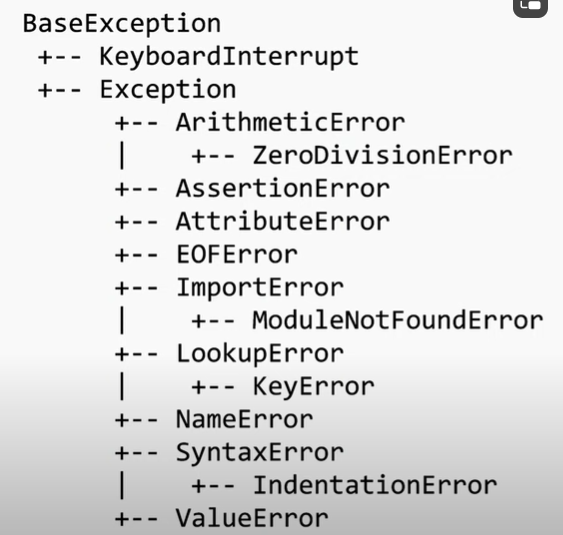

- Instead of trying to catch particular error, I can catch the error that is higher in the hiearchy

# Operator overloading
- you can take very common symbols like "+", "-", etc. and you can implement your own implementation
- "+" does not have to equal addition etc.
  - take for example contatenation in strings, lists, ...
  - in those cases "+" does concatenate rather than add

In [ ]:
class Vault:
  def __init__(self,galleons=0,sickles=0,knuts=0):
    self.galleons = galleons
    self.sickles = sickles
    self.knuts = knuts

potter = Vault(100,50,25)
print(potter)

- we need to add the \_\_str\_\_ method here

In [ ]:
class Vault:
  def __init__(self,galleons=0,sickles=0,knuts=0):
    self.galleons = galleons
    self.sickles = sickles
    self.knuts = knuts

  def __str__(self):
    return f"{self.galleons} Galleons, {self.sickles} Sickles, {self.knuts} Knuts"

# object 1
potter = Vault(100,50,25)
print(potter)

# object 2
weasley = Vault(25,50,100)
print(weasley)

100 Galleons, 50 Sickles, 25 Knuts
25 Galleons, 50 Sickles, 100 Knuts


- now I´ll want to combine the contents of 2 Vaults
- I will want to do something like this

In [ ]:
class Vault:
  def __init__(self,galleons=0,sickles=0,knuts=0):
    self.galleons = galleons
    self.sickles = sickles
    self.knuts = knuts

  def __str__(self):
    return f"{self.galleons} Galleons, {self.sickles} Sickles, {self.knuts} Knuts"

# object 1
potter = Vault(100,50,25)
print(potter)

# object 2
weasley = Vault(25,50,100)
print(weasley)

# ......................................................... here
galleons = potter.galleons + weasley.galleons
sickles = potter.sickles + weasley.sickles
knuts = potter.knuts + weasley.knuts

total = Vault(galleons, sickles, knuts)
print(total)

100 Galleons, 50 Sickles, 25 Knuts
25 Galleons, 50 Sickles, 100 Knuts
125 Galleons, 100 Sickles, 125 Knuts


- I now see 3 Vaults: for Harry, for Wesley and for Total
- but I want to do this: __total = potter + weasley__
  - I need to overload the operator "+" to allow me to add 2 Vaults together
- in documentation I can find __object.\_\_add\_\_(self, other)__
  - it´s going to take the self argument (whatever is on the left side of the "+" sign) and then some other argument (whatever is on the right side of the "+" sign)
- let´s teach python to do this

In [ ]:
class Vault:
  def __init__(self,galleons=0,sickles=0,knuts=0):
    self.galleons = galleons
    self.sickles = sickles
    self.knuts = knuts

  def __str__(self):
    return f"{self.galleons} Galleons, {self.sickles} Sickles, {self.knuts} Knuts"

  def __add__(self,other): # ............................... here I´m teaching python how to deal with it
    galleons = self.galleons + other.galleons
    sickles = self.sickles + other.sickles
    knuts = self.knuts + other.knuts
    return Vault(galleons, sickles, knuts)

# object 1
potter = Vault(100,50,25)
print(potter)

# object 2
weasley = Vault(25,50,100)
print(weasley)

# .......................................................... this is now functional
total = potter + weasley
print(total)

100 Galleons, 50 Sickles, 25 Knuts
25 Galleons, 50 Sickles, 100 Knuts
125 Galleons, 100 Sickles, 125 Knuts
